In [99]:
import galsim as gs
from galsim import Angle, radians
import galsim.roman as roman
import numpy as np
import matplotlib.pyplot as plt

Generating test image
--- build GSObject
CPU times: user 28 µs, sys: 0 ns, total: 28 µs
Wall time: 33.1 µs
--- draw no_pixel image
CPU times: user 1.22 ms, sys: 223 µs, total: 1.44 ms
Wall time: 1.45 ms
--- draw auto image
CPU times: user 1.26 ms, sys: 206 µs, total: 1.47 ms
Wall time: 1.44 ms

Reconstructing GSObject from array
--- build image
CPU times: user 39 µs, sys: 2 µs, total: 41 µs
Wall time: 44.1 µs
--- build GSObject
CPU times: user 2.63 ms, sys: 175 µs, total: 2.8 ms
Wall time: 2.73 ms
--- draw no_pixel image
CPU times: user 525 µs, sys: 56 µs, total: 581 µs
Wall time: 575 µs
--- draw auto image
CPU times: user 2.98 ms, sys: 175 µs, total: 3.15 ms
Wall time: 3.12 ms

 Try PSF convolution and draw image with different scale, dimension and offset
--- generate PSF
CPU times: user 18 µs, sys: 0 ns, total: 18 µs
Wall time: 21 µs
--- convolve
CPU times: user 80 µs, sys: 4 µs, total: 84 µs
Wall time: 88 µs
--- draw auto image
CPU times: user 11.4 ms, sys: 443 µs, total: 11.8 ms
Wa

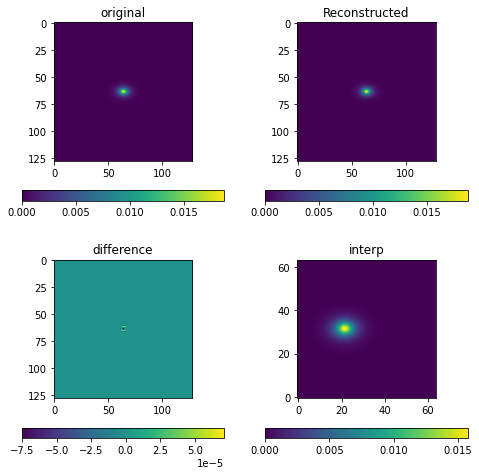

In [81]:
# build a test image
inc = Angle(np.pi/4., unit=radians)
hlr = 0.5
q = 0.2
Nside = 128

fig, axes = plt.subplots(2,2,figsize=[8,8])
print("Generating test image")
print("--- build GSObject")
%time gal = gs.InclinedExponential(inc, half_light_radius=hlr, scale_h_over_r=q)
print("--- draw no_pixel image")
%time img = gal.drawImage(nx=Nside, ny=Nside, scale=0.1, method='no_pixel', bandpass=None)
print("--- draw auto image")
%time img_fft = gal.drawImage(nx=Nside, ny=Nside, scale=0.1, method='auto', bandpass=None)
data = img.array
data_fft = img_fft.array
cb1 = axes[0,0].imshow(data)
axes[0,0].set_title('original')
plt.colorbar(cb1, ax=axes[0,0], orientation='horizontal')

# reconstruct GSObject from image data array
print("\nReconstructing GSObject from array")
print("--- build image")
%time gal_interp_img = gs.Image(data, make_const=True, scale=0.1)
print("--- build GSObject")
%time gal_interp = gs.InterpolatedImage(gal_interp_img, scale=0.1)
print("--- draw no_pixel image")
%time data2 = gal_interp.drawImage(nx=Nside, ny=Nside, scale=0.1, method='no_pixel', bandpass=None).array
print("--- draw auto image")
%time data2_fft = gal_interp.drawImage(nx=Nside, ny=Nside, scale=0.1, method='auto', bandpass=None).array

cb2 = axes[0,1].imshow(data2)
axes[0,1].set_title("Reconstructed")
plt.colorbar(cb2, ax=axes[0,1], orientation='horizontal')

#cb3 = axes[1,0].imshow((data2-data))
cb3 = axes[1,0].imshow(data2_fft-data_fft)
axes[1,0].set_title('difference')
plt.colorbar(cb3, ax=axes[1,0], orientation='horizontal')


# try PSF convolution, difference pixel scale and offset
print("\n Try PSF convolution and draw image with different scale, dimension and offset")
print("--- generate PSF")
%time PSF = gs.Moffat(fwhm=0.2, beta=2.5)
print("--- convolve")
%time final = gs.Convolve([gal_interp, PSF])
print('--- draw auto image')
%time data3 = final.drawImage(nx=Nside/2,ny=Nside/2,scale=0.11,offset=(100,200), method='auto').array
print("--- draw no_pixel image")
%time data3 = final.drawImage(nx=Nside/2,ny=Nside/2,scale=0.11,offset=(-10,0), method='no_pixel').array

cb4 = axes[1,1].imshow(data3, origin='lower')
axes[1,1].set_title('interp')
plt.colorbar(cb4, ax=axes[1,1], orientation='horizontal')

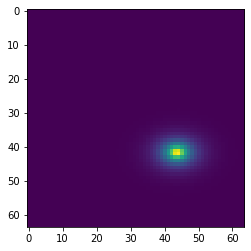

In [26]:
plt.imshow(img.array)

In [30]:
print(img.xmin)
print(img.ymin)
print(img.scale)
print(img.bounds)

1
1
0.1
galsim.BoundsI(1,64,1,64)


CPU times: user 55 µs, sys: 10 µs, total: 65 µs
Wall time: 59.8 µs
CPU times: user 1.35 ms, sys: 839 µs, total: 2.19 ms
Wall time: 1.62 ms


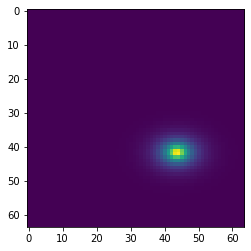

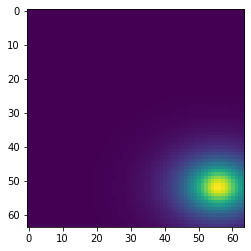

In [42]:
PSF = gs.Moffat(fwhm=0.2, beta=2.5)
final = gs.Convolve([gal_interp, PSF])
plt.imshow(final.drawImage(nx=Nside,ny=Nside,scale=0.05,).array)

In [87]:
def func(x, y, **kwargs):
    c = kwargs.get('c', 0)
    d = kwargs.get('d', 0)
    e = kwargs.get('e', 0)
    return x+y+c+d+e
kwargs={
    'c':1,
    'd':2,
    'e':3,
}
ans = func(0,0,c=1,d=2,e=4)
print(ans)

7


In [98]:
def func2(a,b,c):
    print(a,b,c)
    print("---")
    
a = np.ones([3,2,2])
b = np.zeros([3,2])
c = np.array([3,3,3])
list(map(func2,a,b,c))
func2(a,b,c)

[[1. 1.]
 [1. 1.]] [0. 0.] 3
---
[[1. 1.]
 [1. 1.]] [0. 0.] 3
---
[[1. 1.]
 [1. 1.]] [0. 0.] 3
---
[[[1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]] [[0. 0.]
 [0. 0.]
 [0. 0.]] [3 3 3]
---


CPU times: user 2.04 s, sys: 20.6 ms, total: 2.06 s
Wall time: 2.11 s
CPU times: user 5.65 ms, sys: 320 µs, total: 5.97 ms
Wall time: 5.86 ms


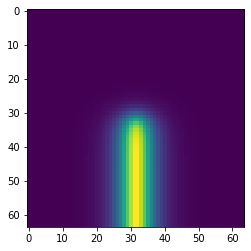

In [102]:
imgs = []
%time for i in range(1000): imgs.append( final.drawImage(nx=Nside/2,ny=Nside/2,scale=0.11,offset=(0,0+i*0.1), method='auto') )
%time img_sum = np.sum(imgs)
plt.imshow(img_sum.array)

In [106]:
x = np.arange(-1,1,0.1)
y = np.arange(3,4,0.1)
print(x.shape, y.shape)
X, Y = np.meshgrid(x, y)
print(X.shape)

(20,) (10,)
(10, 20)


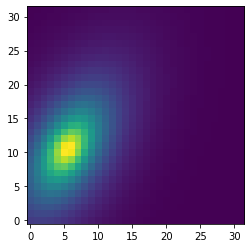

In [128]:
gal = gs.InclinedExponential(inclination=Angle(45,radians),
                              half_light_radius=0.5, 
                              scale_h_over_r=0.2, 
                              flux=1.0)
gal = gal.rotate(Angle(np.pi/3., radians))
gal = gal.shear(g1=0., g2=0.)
img = gal.drawImage(nx=32,ny=32,scale=0.05, method='no_pixel', offset=(-10,-5)).array
plt.imshow(img, origin='lower')

In [133]:
a = np.array([0,1,2,3,4,5,6,7,8,9])
b = a.reshape((2,5))
print(b)
c = b.reshape((5,2))
print(c)
d = c.flatten()
print(d)

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[0 1 2 3 4 5 6 7 8 9]
